# ANALISIS CATEGORICO X NUMERICO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./dataset.csv",delimiter=";")

In [3]:
data.nunique() #CANTIDAD DE VALORES DIFERENTES EN EL DATASET

SOCIO                     8618
CUENTA                    8618
AGENCIA                      7
TIPO_SOCIO                   4
MONEDA                       1
PAGARE                    9734
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
DIAS                         4
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [4]:
data.head()

,SOCIO,CUENTA,AGENCIA,TIPO_SOCIO,MONEDA,PAGARE,PRODUCTO,FEC_ULT_PAGO,TEA_INTERES,CUOTA_FIJA,...,CUO_FALTANTES_VIGENTES,NDIAS_ATRASADOS,MONTO_PRESTAMO,SALDO_PRESTAMO,NRO_REPRO,ANA_ORIGEN,ANA_ACTUAL,PROFESION,OCUPACION,ACTIVIDAD_ECO
0,"TORRES PUMA, JOSEPH",16927,1,1,S,01- 16945,MAS VELOZ,2021-11-10,69.39,121.22,...,6,852,1100.0,623.95,NaN,"BUSTAMANTE BACA, CESAR EDUARDO","PEÑA CANO, MENLY AMBERGAR",Controlador,CONTROLADOR,Empleado Sector Privado
1,"AROCCA PEREZ, MEDALY",17992,1,1,S,01-17776,CREDITO DIGITAL,2021-10-31,101.22,426.95,...,3,964,1650.0,1156.90,NaN,"GARCIA LINARES, RODRIGO","ZAGA BERRERAS, DANNY",Su Casa,COMERCIANTE DE GANADOS,Agricultura y Ganaderia
2,"CHOSEC TTITO, KAREN",27494,3,1,S,03-0010240-2,RAPIDIN INVERSION,2024-04-24,45.93,484.19,...,3,0,11000.0,1017.69,NaN,"SALAS LECHUGA, MARIELA","SALAS LECHUGA, MARIELA",Comerciante,VENTA DE ROPA,Ambulantes y Puestos de Venta en Mercado
3,"CASTILLO SACA, ALEJANDRA",24538,3,1,S,03-0010590,SEMANAL MICRO,2024-04-26,100.08,146.11,...,1,29,1100.0,142.18,NaN,"SALAS LECHUGA, MARIELA","SALAS LECHUGA, MARIELA",Comerciante,VENTA DE COMIDA,"Restaurante, Bares y Cantinas"
4,"CARBAJAL CARDENAS, MARITZA",27564,3,1,S,03- 0010852,PAGA DIARIO (CT),2024-04-20,125.22,19.32,...,0,0,550.0,0.00,NaN,"CARHUAS HUANQUI, FERNANDO","CARHUAS HUANQUI, FERNANDO",No Especificada,VENTA DE COMIDAS ( POLLO),Otros Servicios


In [5]:
data.NOM_FRECUENCIA.value_counts()

NOM_FRECUENCIA
DIAS         4535
MESES        3725
SEMANAS      1392
QUINCENAS      82
Name: count, dtype: int64

In [6]:
data_Frec= data.query('NOM_FRECUENCIA == "DIAS "')

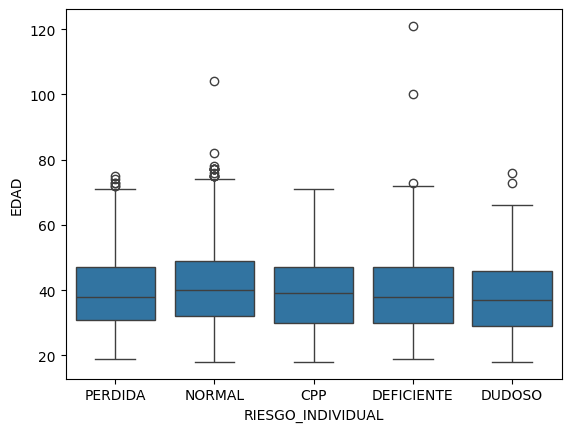

In [7]:
ax = sns.boxplot(data=data, x='RIESGO_INDIVIDUAL', y='EDAD')

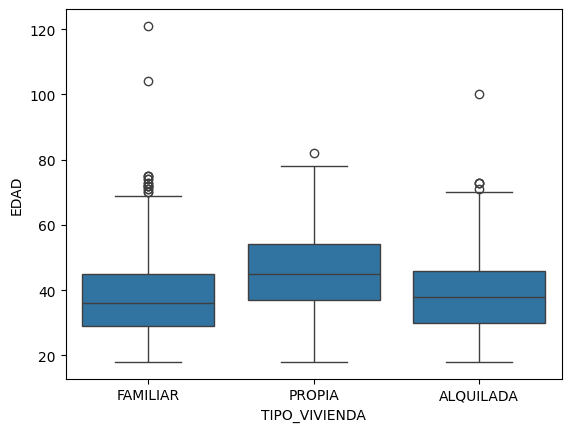

In [9]:
ax = sns.boxplot(data=data, x='TIPO_VIVIENDA', y='EDAD')

Podemos observar observaciones acerca de la distribucion de socios por el tipo de vivienda
- Los socios con vivienda familiar y alquilada, Son socios que tienen una edad menor que los que poseen una vivienda propia
- En la distribucion de edad de socios por tipo de vivienda fluctua entre los 25 y los 70

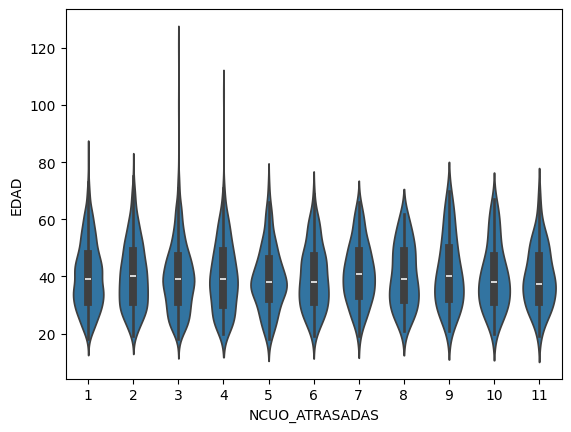

In [10]:
ax = sns.violinplot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 12'), x='NCUO_ATRASADAS', y='EDAD')

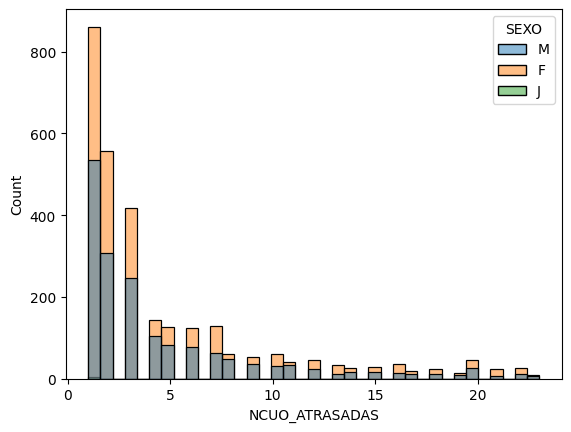

In [11]:
ax = sns.histplot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 24'), x='NCUO_ATRASADAS', hue='SEXO')

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27100\2369820446.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 24'), x='NCUO_ATRASADAS', hue='SEXO', kind='kde')


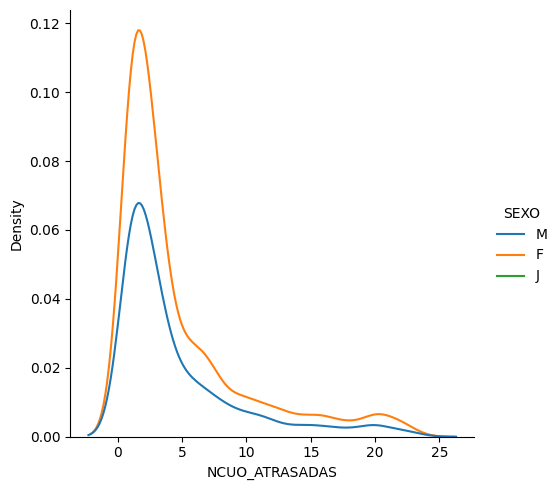

In [12]:
ax = sns.displot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 24'), x='NCUO_ATRASADAS', hue='SEXO', kind='kde')

### NORMALIZANDO LAS PROFESIONES

In [13]:
data.loc[data['PROFESION'].isin(['No Especificada', 'No Tiene', 'Su Casa']), 'PROFESION'] = 'GENERAL'
data.loc[data['PROFESION'].isin(['Cosmetologo, Peluquero y Barbero', 'Cosmetologa', 'Especialista en Tratamiento de Belleza']), 'PROFESION'] = 'Estilista'
data.loc[data['PROFESION'].isin(['Docente','Contador','Enfermero','Farmaceutico','Empleado de oficina','Ingeniero Civil','Ingeniero de Sistemas','Secretaria','Odontologo','Nutricionista','Ingeniero Mecánico Electrico','Analista de Sistema y Computacion','Arquitecto','Antropologo, Arqueologo y Etnologo','Ing. Industrial','Psicologo','Agronomo','Medico y Cirujano','Topógrafo','Ingeniero Quimico','Obstetriz','Agrimensor y Topografo','Entrenador Deportivo','Director de Empresas','Relacionista Publico e Industrial','Sociologo','Bacteriologo, Farmacologo']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['Biologo', 'Geografo','Abogado','Ingeniero Agronomo','Deportista Profesional y Atleta']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['Economista']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Administrador de Empresas (Profesional)', 'Locutor de Radio, Tv',  'Fotografo y Operador de Camara, Cine TV']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Veterinario']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Policia']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Biologo', 'Geografo','Abogado','Ingeniero Agronomo','Deportista Profesional y Atleta']), 'PROFESION'] = 'profesional'
# data.loc[data['RIESGO'].isin(['CPP', 'DEFICIENTE', 'DUDOSO']), 'RIESGO'] = 'PERDIDA'
data.loc[data['PROFESION'].isin(['Chofer', 'Conductor de Vehiculos de Motor','Albañil'
,'Carpintero', 'Supervisor','Tapicero','Electricista (Tecnico)','soldador','Sastre','Mecanico de Vehiculos de Motor','Vigilante']), 'PROFESION'] = 'oficio'
data.loc[data['PROFESION'].isin(['Técnico en Computacion', 'Agricultor','Controlador'
,'Recepcionista', 'Modista','Laboratorista(técnico)','Gasfitero','Radio Tecnico','Sastre','Mecanico de Vehiculos de Motor','Vigilante']), 'PROFESION'] = 'oficio'
data.loc[data['PROFESION'].isin(['Estilista', 'Artesano Textil ','Musico'
,'Pintor', 'Escultor','Actor, Artista y Director Espectaculos','Decorador, Dibujante, Public. y Diseñado','Coreografo y Bailarines','Autor Literario, Escritor y Critico ','Obrero artesanal']), 'PROFESION'] = 'artista'
data.loc[data['PROFESION'].isin(['Autor Literario, Escritor y Critico']), 'PROFESION'] = 'artista'
data.loc[data['PROFESION'].isin(['Artesano Textil', 'Artesano de Cuero','Supervisor','Tapicero']), 'PROFESION'] = 'oficio'
data.loc[data['PROFESION'].isin(['GENERAL', 'Estudiante']), 'PROFESION'] = 'general'
data.loc[data['PROFESION'].isin(['Periodista']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['Mecanico Motores Aviones y Naves Marinas','Ingenierio de Minas', 'Modelo']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['mecanico', 'obrero']), 'PROFESION'] = 'oficio'

In [14]:
data.PROFESION.value_counts()

PROFESION
Comerciante    4932
general        2530
oficio         1239
profesional     890
artista         143
Name: count, dtype: int64

<Axes: xlabel='PROFESION', ylabel='EDAD'>

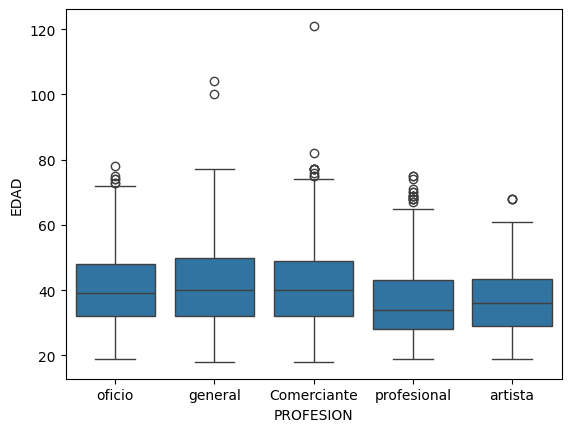

In [15]:
sns.boxplot(data = data, x = 'PROFESION', y='EDAD')

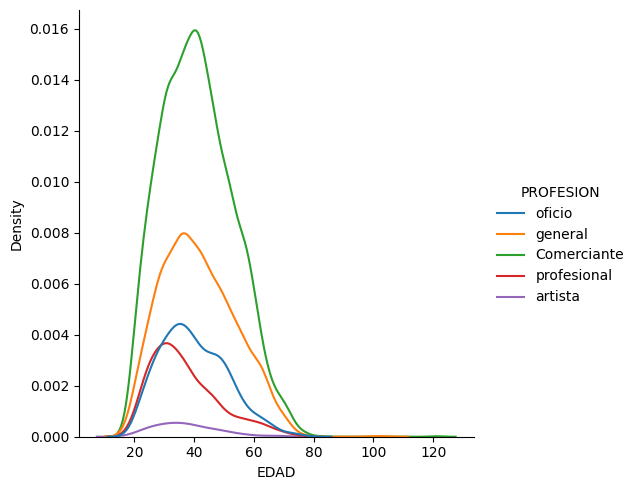

In [16]:
ax = sns.displot(data=data, x='EDAD', hue='PROFESION', kind='kde')

<Axes: xlabel='EDAD', ylabel='Probability'>

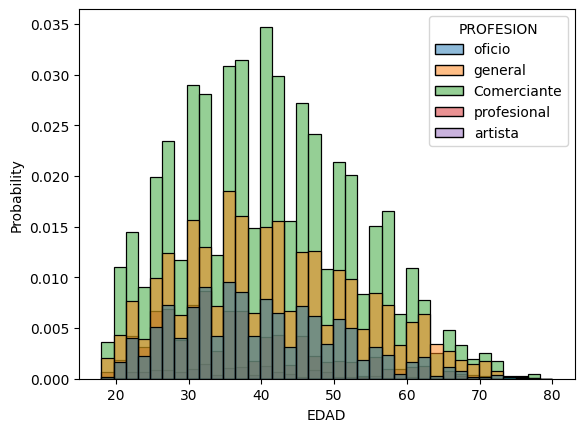

In [17]:
sns.histplot(data=data, x='EDAD', hue ='PROFESION', stat='probability', binrange=(18,80))

<Axes: xlabel='NOM_FRECUENCIA', ylabel='EDAD'>

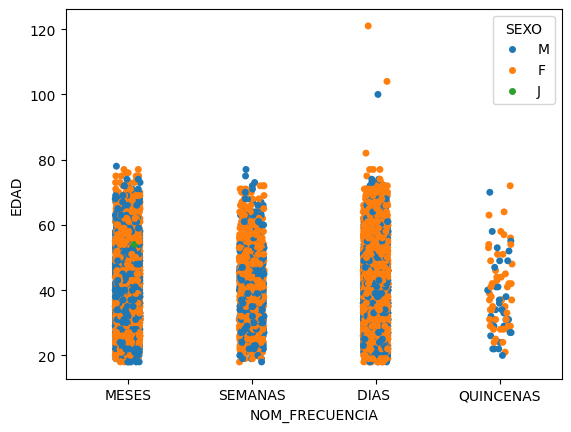

In [18]:
sns.stripplot(data=data, x="NOM_FRECUENCIA", y="EDAD", hue='SEXO')

In [19]:
data.OCUPACION.value_counts()

OCUPACION
COMERCIANTE                                           1481
TAXISTA                                                226
VENTA DE ABARROTES                                     195
TIENDA DE ABARROTES                                    165
RESTAURANTE                                            165
                                                      ... 
VENTA DE COMIDAS(DESAYUNOS)                              1
COMERCIANTE DE CARNE EN EL MERCADO DE MAYORISTAS D       1
VENTA DE POLLOS MERCADO DE PRODUCTORES                   1
COMERCIANTE TIENDA DE ABARROTES                          1
FABRICANTE DE ESTANTES DE MELAMINA                       1
Name: count, Length: 2900, dtype: int64

In [20]:
data.loc[data['PROFESION']== 'general'].OCUPACION.value_counts()

OCUPACION
COMERCIANTE              297
COMERCIANTE              105
                          76
RESTAURANTE               48
VENTA DE ABARROTES        46
                        ... 
COMERCIANRE                1
INTERNET                   1
AGRICULTOR                 1
RENVADORA DE CALZADOS      1
ABOGADO                    1
Name: count, Length: 1020, dtype: int64

In [21]:
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].isin(["ABOGADO", "ADMINISTRADOR", "ADMINISTRADORA", "AGENTE DE VIGILANCIA", "ANALISTA", "ANALISTA DE CREDITOS", "ANALISTA DE SISTEMAS", "ARQUITECTO", "ASISTENTE ADMINISTRATIVO", "ASISTENTE DENTAL", "ASESOR COMERCIAL", "ASESOR DE CREDITOS", "ASESOR DE NEGOCIOS", "ASESOR DE VENTAS", "ASESOR FINANCIERO", "AUDITOR", "AUXILIAR DE ALMACEN", "AUXILIAR DE FISCALIZACION", "AUXILIAR DE JARDIN", "BACHILLER EN INGENIERÍA DE MINAS", "BARMAN", "CHOFER", "COBRADORA", "COCINERO", "CONTADOR", "CONTADORA", "COORDINADOR", "COSMETOLOGO", "COSMETOLOGA", "DECORADOR", "DECORADORA", "DEPENDIENTE FORMAL", "DISEÑADOR DE GRAFICOS", "DISEÑADOR PUBLICITARIO", "DOCENTE", "ENFERMERA", "EJECUTIVO DE VENTAS", "EMPLEADO", "EMPLEADA", "EMPLEADOR", "EMPRESARIO", "FISIOTERAPEUTA", "FOTOGRAFO PROFESIONAL", "GERENTE", "GESTOR DE VENTAS", "GESTOR TECNICO", "GUIA DE TURISMO", "GUIA OFICIAL", "GUIA OFICIAL DE TURISMO", "INGENIERO METALURGICO", "JEFA DE HOGAR", "LABORATORISTA", "LICENCIADO EN TURISMO", "MAESTRO DE OBRA", "MEDICO", "MERCADERISTA", "MILITAR", "MINISTRA", "MOZA", "NIÑERA", "OFTALMOLOGA", "OPTOMETRISTA", "OPERADOR DE MAQUINARIA", "OPERARIO", "OPERARIO DE ALMACEN", "OPERARIO DE LIMPIEZA DE VEHICULOS", "OPTIMOMETRA", "PARAMÉDICO", "PERSONAL TRAINING", "PISICOLOGO", "POLICIA", "POLICIA MUNICIPAL", "PREVEN", "PREVENTISTA", "PROFESORA", "PROMOTOR DE VENTAS", "PROMOTORA DE VENTAS", "PROVEDORA", "PSICÓLOGA", "RECEPCIONISTA", "REPRESENTANTE DE VENTAS", "RESIDENTE DE OBRA", "SASTRE", "SUPERVISOR", "SUPERVISOR COMERCIAL", "SUPERVISOR DE OBRAS", "SUPERVISOR DE TIENDA", "TAXISTA", "TECNICO DE CELULARES", "TECNICO DE MANTENIMIENTO", "TECNICO ELECTRICISTA", "TECNICO EN COMPUTACION", "TECNICO EN ENFERMERIA", "TECNICO EN FARMACIA", "TECNÓLOGA EN CONTABILIDAD", "TRABAJADORA", "TRABAJADORA SOCIAL", "TRABAJADOR ADMINISTRATIVO", "TRABAJADOR DEPENDIENTE", "TRABAJADOR DEPENDIENTE INFORMAL", "TRABAJADOR MUNICIPAL", "TRABAJADOR DEL GOBIERNO REGIONAL", "TRAINER", "TRIPULANTE DE SERVICIO A BORDO", "VETERINARIO"])), 'PROFESION'] = 'profesional'
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].str.startswith('COMERCI')), 'PROFESION'] = 'Comerciante'
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].str.startswith('VENTA')), 'PROFESION'] = 'Comerciante'
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].str.startswith('VENDE')), 'PROFESION'] = 'Comerciante'
data.loc[(data['PROFESION'] == 'general') & (~data['OCUPACION'].isnull()), 'PROFESION'] = 'oficio'

In [22]:
data.PROFESION.value_counts()

PROFESION
Comerciante    5996
oficio         2423
profesional    1073
artista         143
general          99
Name: count, dtype: int64

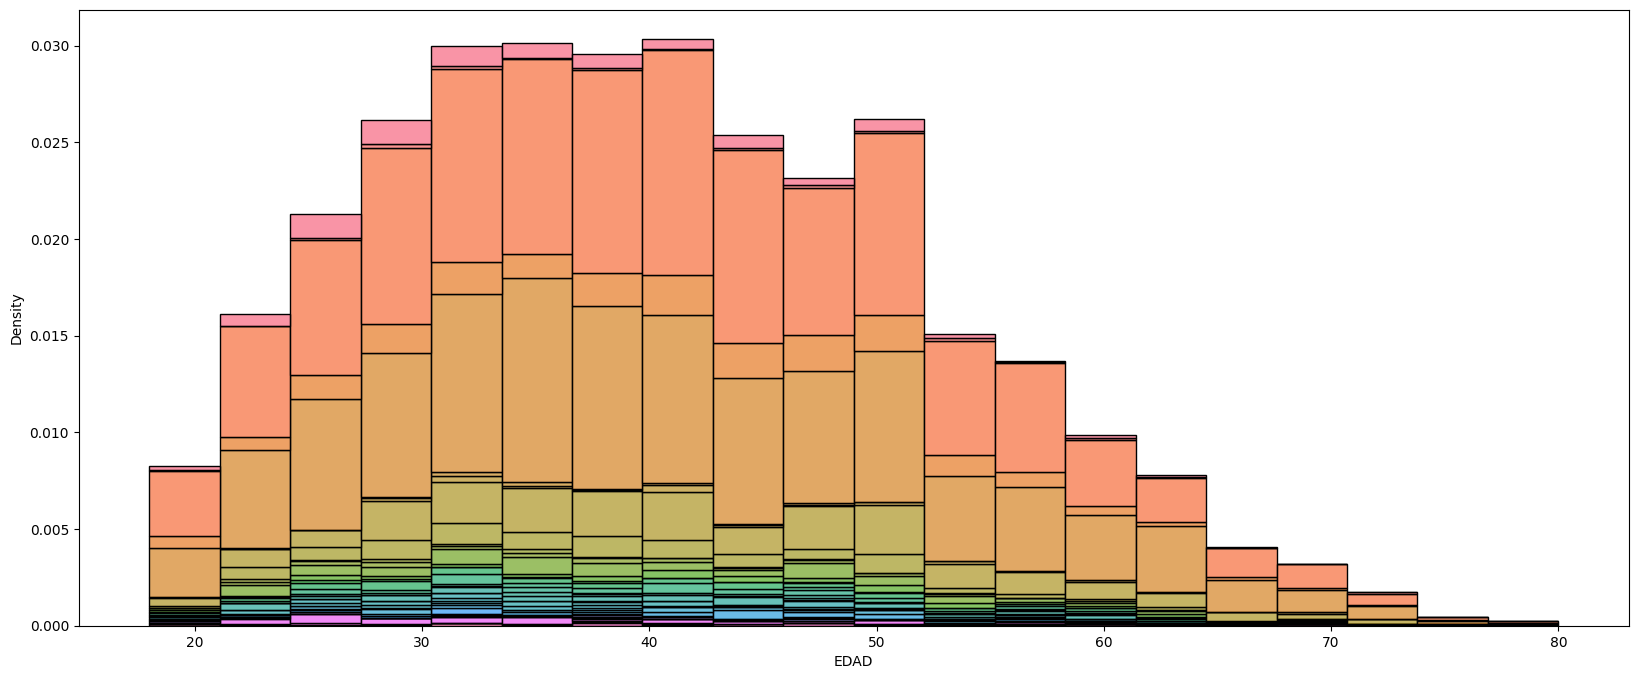

In [23]:
plt.figure(figsize=(20, 8)) 
sns.histplot(data=data, x='EDAD', hue='ACTIVIDAD_ECO', stat='density', binrange=(18, 80), multiple="stack", legend=False, bins=20)
plt.show()

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27100\3306689238.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data=data, x='EDAD', hue='ACTIVIDAD_ECO', kind='kde')


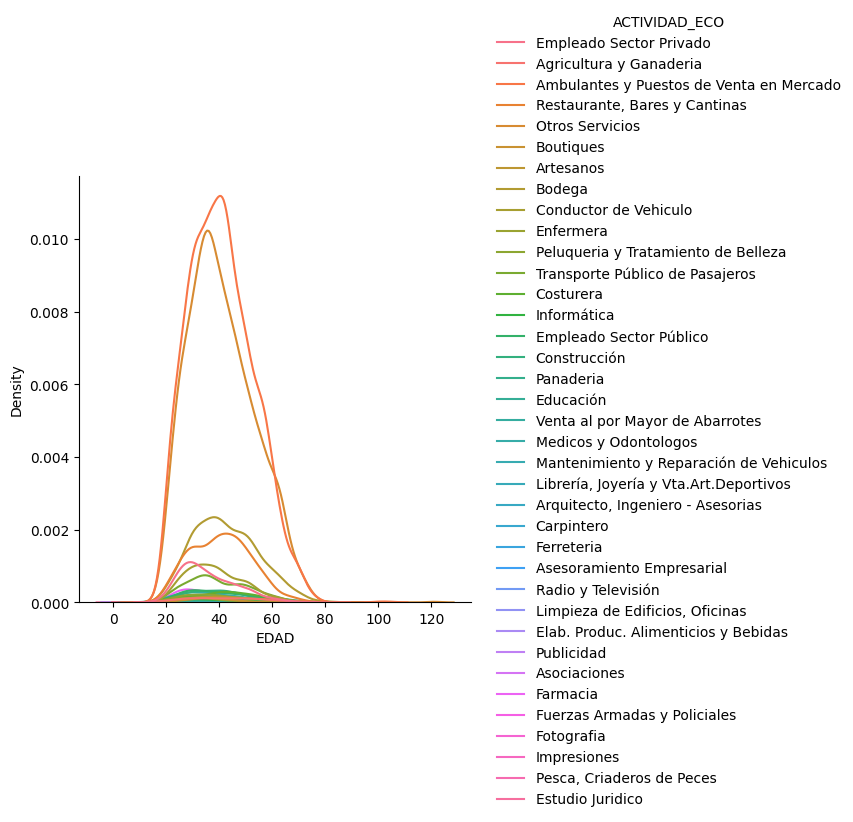

In [25]:
ax = sns.displot(data=data, x='EDAD', hue='ACTIVIDAD_ECO', kind='kde')

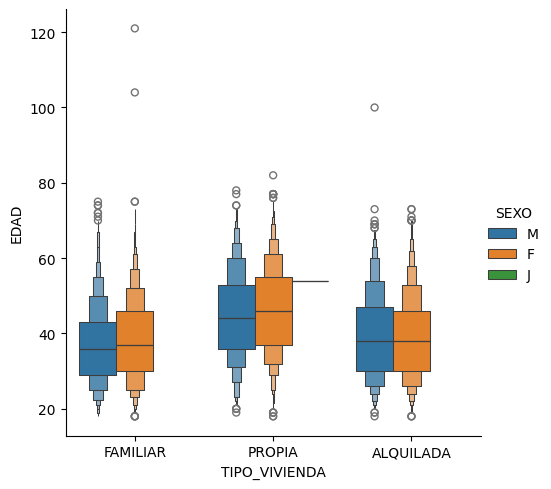

In [24]:
sns.catplot(data=data, x="TIPO_VIVIENDA", y="EDAD", hue="SEXO", kind="boxen")

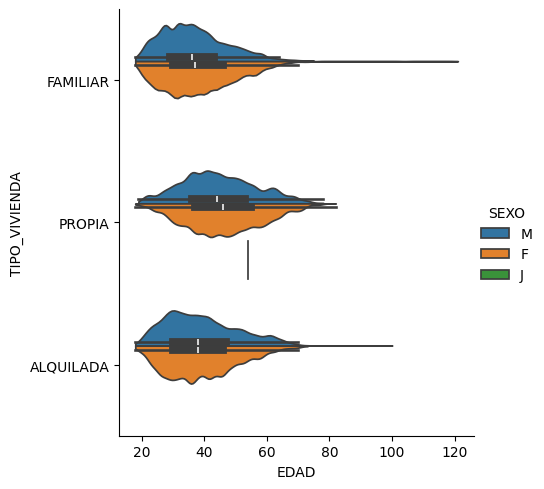

In [26]:
sns.catplot(
    data=data, x="EDAD", y="TIPO_VIVIENDA", hue="SEXO",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

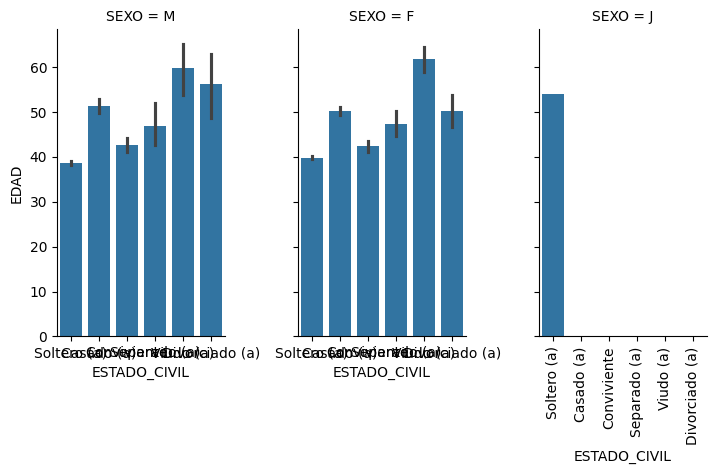

In [27]:
sns.catplot(
    data=data, x="ESTADO_CIVIL", y="EDAD", col="SEXO",
    kind="bar", height=4, aspect=.6, 
)
plt.xticks(rotation=90)
plt.show()

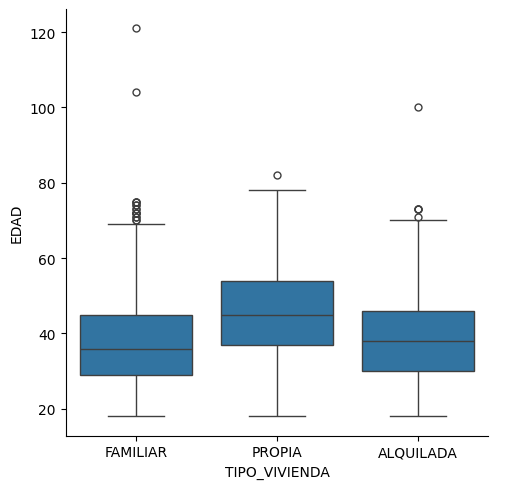

In [28]:
sns.catplot(data=data, x="TIPO_VIVIENDA", y="EDAD", kind="box")